In [58]:
import numpy as np
from numpy.linalg import eig
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


PCA code from slides 7 - 13

In [59]:
array = np.array([[1,2],
                  [2,1]])
eigenvalue,eigenvector=eig(array)
print('Eigenvalues:', eigenvalue)
print('Eigenvectors:',eigenvector)

Eigenvalues: [ 3. -1.]
Eigenvectors: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [60]:
magnitudes =[]
for i in range(len(eigenvector)):
    magnitude_i = 0

    for j in range(len(eigenvector[i])):
        coefficient_ij=eigenvector[i,j]
        magnitude_i=magnitude_i+(coefficient_ij**2)
    magnitudes.append(np.sqrt(magnitude_i))
    print('list of the magnitudes of the eigenvectors;',magnitudes)

list of the magnitudes of the eigenvectors; [0.9999999999999999]
list of the magnitudes of the eigenvectors; [0.9999999999999999, 0.9999999999999999]


In [61]:
def sort_eigens(eigenvalues,eigenvectors):
    df_eigen=pd.DataFrame(eigenvectors)
    df_eigen['Eigenvalues']=eigenvalues
    df_eigen.sort_values("Eigenvalues",inplace=True,ascending=False)
    sorted_eigenvalues = np.array(df_eigen['Eigenvalues'])
    sorted_eigenvectors=np.array(df_eigen.drop(columns='Eigenvalues'))
    return sorted_eigenvalues,sorted_eigenvectors

In [62]:
def reorien_data(df,eigenvectors):
    numpy_data=np.array(df)
    pca_features=np.dot(numpy_data,eigenvectors)
    pca_df=pd.DataFrame(pca_features)
    return pca_df

Code on slide 14

In [63]:
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)


Code from 'github.com/creanero/pca_test'

In [64]:
def get_sum(array):
    # creates a running sum
    running_sum = 0

    # iterates over all values in array
    for value in array:
        # adds the values to the running sum
        running_sum = running_sum + value

    # returns the final sum
    return running_sum


def get_count(array):
    # creates a running count
    count = 0

    # iterates over all the values in array
    for value in array:
        # adds 1 to the running count
        count = count + 1

    # returns the final count
    return count


def get_mean(array):
    # uses the function to get the sum of array
    sum_array = get_sum(array)
    # uses the function to get the count of array
    count_array = get_count(array)
    # divides the sum by the count to get the mean
    mean_array = sum_array / count_array

    # returns the mean
    return mean_array


def get_variance(array):
    # variance of an array is its covariance with itself
    variance = get_covariance(array,array)
    return variance


def check_lengths (length_1, length_2):
    # checks that they are equal and raises an exception if not
    if length_1 != length_2:
        raise Exception("array_1 and array_2 must be equal in length!\n"
                        "Unforunately array_1 is {} and array_2 is {} long!\n".
                        format(length_1,length_2))

    else:
        return True


def get_length(array_1,array_2):
    # gets the length of the arrays array_1 and array_2
    count_array_1 = get_count(array_1)
    count_array_2 = get_count(array_2)

    # runs check_lengths which will raise an exception if the lengths are unequal
    check_lengths(count_array_1, count_array_2)

    # if they're equal, pick one of them to return
    count = count_array_1

    # return the count
    return count


def get_covariance(array_1,array_2):
    # gets the lengths of the arrays, which must be the same
    length = get_length(array_1,array_2)

    # gets the means of array_1 and y
    mean_array_1 = get_mean(array_1)
    mean_array_2 = get_mean(array_2)

    # creates a variable to handle the multiples of the differences
    sum_multiples = 0

    for i in range(length):
        # gets the differences from the mean
        difference_array_1 = array_1[i] - mean_array_1
        difference_array_2 = array_2[i] - mean_array_2

        # multiplies them by one another
        multiple = difference_array_1 * difference_array_2

        # adds this to the running sum
        sum_multiples = sum_multiples + multiple

    # divides the running sum by the count to get the covariance
    covariance = sum_multiples / length

    return covariance


def get_stdev(array):
    # uses the function to get the variance
    variance = get_variance(array)
    # gets the square root of the variance
    stdev = variance**0.5

    # returns that square root
    return stdev


def standardise_array(array):
    # gets the mean and standard deviation with the functions
    mean_array = get_mean(array)
    stdev_array = get_stdev(array)

    # creates a placeholder array
    standardised_array = []
    # iterates over all values in array
    for value in array:
        # uses the function to find its standardised valye
        value_standardised = standardise_value (value, mean_array, stdev_array)
        # appends that value to the array
        standardised_array.append(value_standardised)

    # returns the standardised array
    return standardised_array


def standardise_value (value, mean, stdev):
    difference = value - mean
    standard_value = difference/stdev

    return standard_value


def check_lengths_lists(lists):
    length = get_count(lists)

    # checks to see if the list is one element
    if length <= 1:
        raise Exception("Cannot compare lengths unless there a more than one, this has {}".
                        format(length))
    else:
        for i in range(length-1):
            # compares each list against the next one to see if they are the same length
            # runs check_lengths which will raise an exception if the lengths are unequal
            length_1 = get_count(lists[i])
            length_2 = get_count(lists[i+1])
            check_lengths(length_1,length_2)


def transpose(columns):
    # creates a placeholder for the rows
    rows = []

    # checks the lengths of the lists to ensure they can be transposed
    # runs check_lengths_lists which will raise an exception if the lengths are unequal
    check_lengths_lists(columns)

    # gets the length and width of the table
    length = get_count(columns[0])
    width = get_count(columns)

    # iterates down the legths of the columns
    for i in range(length):
        # creates a row
        row = []
        # iterates over the width of the table
        for j in range(width):
            # gets the value in that position
            value = columns[j][i]

            # adds it to the row
            row.append(value)
        # adds the row to the list of rows
        rows.append(row)

    # returns the rows
    return rows


def standardise_df(df):
    # creates a placeholder array for the standardised columns
    standard_columns = []

    # iterates over the columns in the dataframe by name
    for column_name in df:
        # gets each column from its name
        column = df[column_name]
        # standardises the column
        standard_column = standardise_array(column)
        # adds it to the array
        standard_columns.append(standard_column)

    # creates a list of rows from the list of columns
    standard_rows = transpose(standard_columns)

    # create a new dataframe
    standard_df = pd.DataFrame(standard_rows, columns=df.columns)

    # returns the standardised dataframe
    return standard_df


def calculate_covariance_matrix(df):
    # creates a placeholder list
    covariance_list=[]

    # goes through the dataframe once per variable
    for column_name_1 in df:
        row = []

        # and compares each variable with all variables (including itself)
        for column_name_2 in df:
            # gets the covariances of the pairs of variables
            covariance = get_covariance(df[column_name_1], df[column_name_2])
            # adds each covariance to the row
            row.append(covariance)

        # adds each new row to the list
        covariance_list.append(row)

    # converts the lists to a numpy array
    covariance_matrix = np.array(covariance_list)
    return covariance_matrix


def get_data(dataset):

    data = dataset

    df = pd.DataFrame(data.data,columns=data.feature_names)

    df['target'] = pd.Series(data.target)

    print(df.head())


def explore_data(df):
    # prints the dataframe
    print(df)

    # gets the columns of the datframe
    columns = df.columns

    # goes through the columns pairwise
    for i in range(len(columns)):
        for j in range(len(columns)):
            # doesn't show plots where i is greater than or equal to j
            if not i >= j:
                # gets the names of the columns
                x_name = columns[i]
                y_name = columns[j]

                # gets the data
                x = df[x_name]
                y = df[y_name]

                # plots the data
                plt.plot(x, y, ".")

                # with relevant labels
                plt.xlabel(f"PC {i + 1}")
                plt.ylabel(f"PC {j + 1}")
                print("{} vs {}".format(y_name, x_name))
                plt.show()


def check_eigen(eigenvalues, eigenvectors):
    # prints the eigenvalues (a 2x1 array)
    print('Eigenvalues:', eigenvalues)
    # prints the eigenvectors (a 2x2 array)
    print('Eigenvectors:', eigenvectors)

    # checks the magnitudes of the eigenvectors
    check_eigenvector_magnitudes(eigenvectors)


def check_eigenvector_magnitudes(eigenvectors):
    magnitudes=[]

    # iterates through the first axis
    for i in range(len(eigenvectors)):
        # creates a temporary variable to hold the magnitudes
        magnitude_i = 0

        # iterates over the second axis
        for j in range(len(eigenvectors[i])):
            # gets the coefficient for a given set of coordinates (i, j)
            coefficient_ij = eigenvectors[i,j]
            # squares this and adds it to the temporary valye
            magnitude_i = magnitude_i+(coefficient_ij**2)

        # gets the square root and puts it into an array
        magnitudes.append(np.sqrt(magnitude_i))

    # prints the magnitudes
    print('List of the magnitudes of the eigenvectors:', magnitudes)


def sort_eigens(eigenvalues, eigenvectors):
    # creates a pandas dataframe out of the eigenvectors
    df_eigen = pd.DataFrame(eigenvectors)

    # adds a column for the eigenvalues
    df_eigen['Eigenvalues'] = eigenvalues
    
    # sorts the dataframe in place by eigenvalue
    df_eigen.sort_values("Eigenvalues", inplace=True, ascending=False)

    # makes a numpy array out of the sorted eigenvalue column
    sorted_eigenvalues = np.array(df_eigen['Eigenvalues'])
    # makes a numpy array out of the rest of the sorted dataframe
    sorted_eigenvectors = np.array(df_eigen.drop(columns="Eigenvalues"))

    # returns the sorted values
    return sorted_eigenvalues, sorted_eigenvectors


def create_names(count=None, collection=[], prefix="", delimter="_"):
    if count is None:
        count = get_count(collection)
    names = []
    for i in range(count):
        name = "{}{}{}".format(prefix, delimter, i)
        names.append(name)

    return names


def reorient_data(df,eigenvectors):
    # turns the dataframe into a numpy array to enable matrix multiplication
    numpy_data = np.array(df)

    # mutiplies the data by the eigenvectors to get the data in terms of pca features
    pca_features = np.dot(numpy_data, eigenvectors)

    # creates labels for the Principal components
    names = create_names(collection=eigenvectors, prefix="PC", delimter="_")

    # turns the new array back into a dataframe for plotting
    pca_df = pd.DataFrame(pca_features, columns=names)

    return pca_df


def main():
    data = load_iris()
    df = pd.DataFrame(data.data, columns=data.feature_names)

    standard_df = standardise_df(df)

    covariance_matrix = calculate_covariance_matrix(standard_df)

    eigenvalues, eigenvectors = eig(covariance_matrix)

    sorted_eigenvalues, sorted_eigenvectors = sort_eigens(eigenvalues, eigenvectors)

    pca_df = reorient_data(df,sorted_eigenvectors)
    pca_df['target'] = data.target
    explore_data(pca_df)


main function redone, using standardised data

eigenvalues:
[2.91849782 0.91403047 0.14675688 0.02071484]
eigenvectors:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
         PC_0      PC_1      PC_2      PC_3  target
0   -2.264703 -0.480027 -0.127706  0.024168       0
1   -2.080961  0.674134 -0.234609  0.103007       0
2   -2.364229  0.341908  0.044201  0.028377       0
3   -2.299384  0.597395  0.091290 -0.065956       0
4   -2.389842 -0.646835  0.015738 -0.035923       0
..        ...       ...       ...       ...     ...
145  1.870503 -0.386966  0.256274  0.389257       2
146  1.564580  0.896687 -0.026371  0.220192       2
147  1.521170 -0.269069  0.180178  0.119171       2
148  1.372788 -1.011254  0.933395  0.026129       2
149  0.960656  0.024332  0.528249 -0.163078       2

[150 rows x 5 columns]
PC_1 vs PC_0


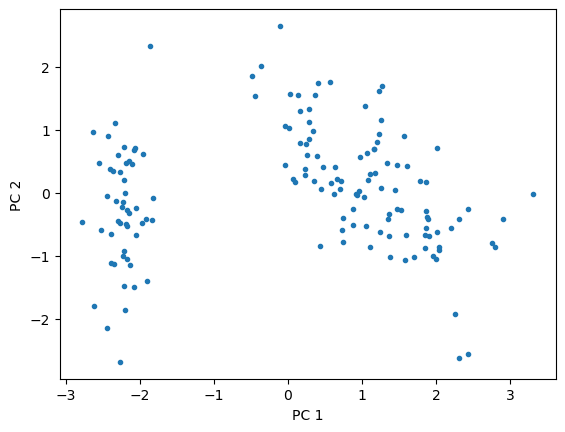

PC_2 vs PC_0


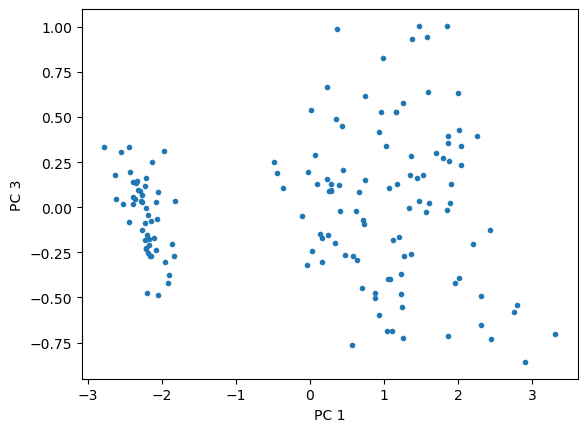

PC_3 vs PC_0


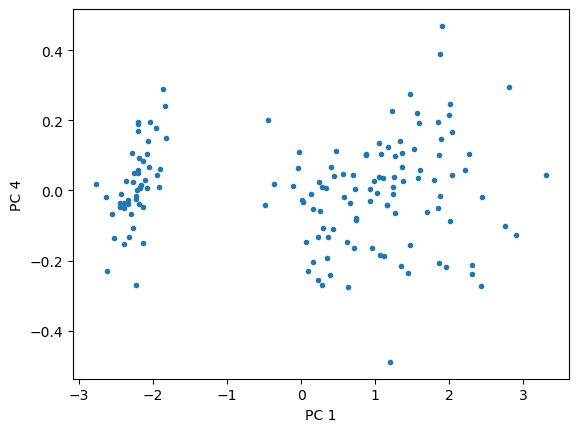

target vs PC_0


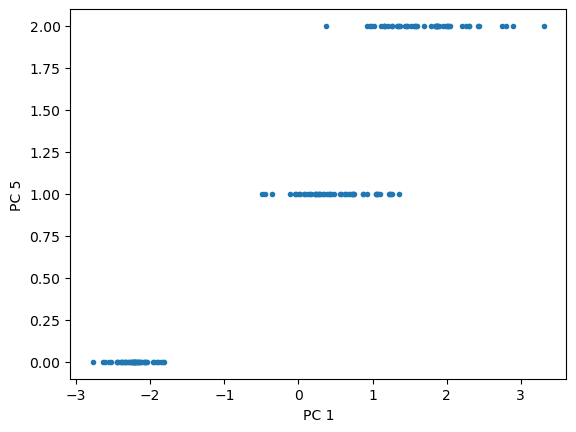

PC_2 vs PC_1


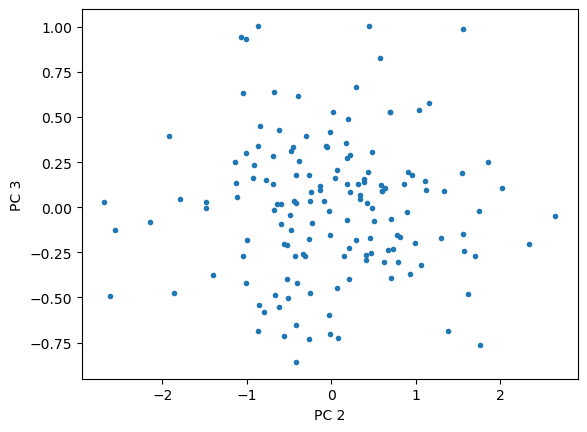

PC_3 vs PC_1


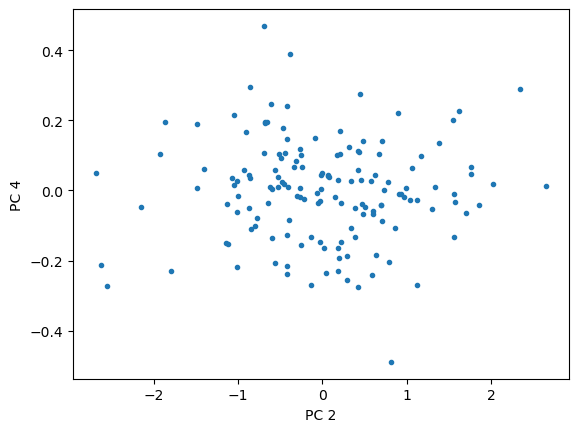

target vs PC_1


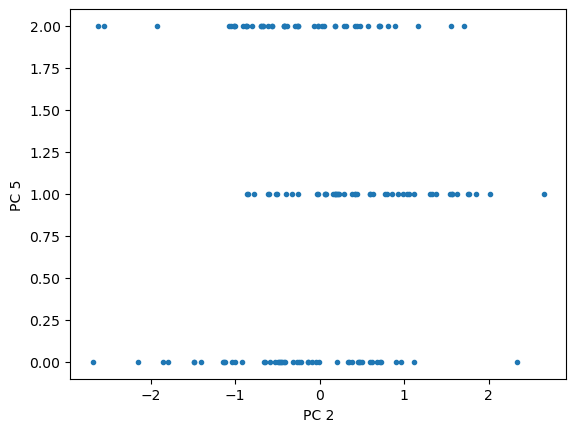

PC_3 vs PC_2


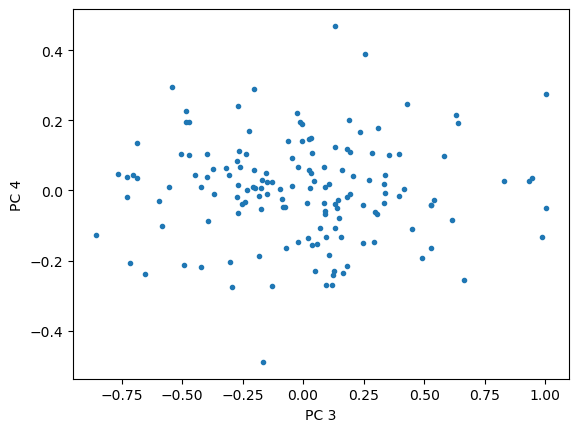

target vs PC_2


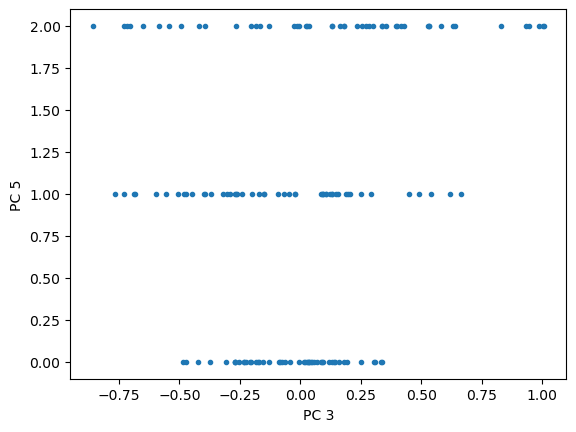

target vs PC_3


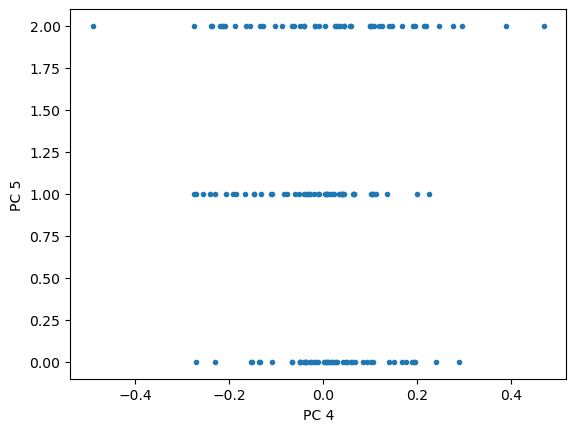

In [65]:
def main1():
    data = load_iris()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    standard_df = standardise_df(df)
    covariance_matrix = calculate_covariance_matrix(standard_df)
    eigenvalues, eigenvectors = eig(covariance_matrix)
    sorted_eigenvalues, sorted_eigenvectors = sort_eigens(eigenvalues, eigenvectors)
    pca_df = reorient_data(standard_df, sorted_eigenvectors)
    pca_df['target'] = data.target
    print("eigenvalues:")
    print((sorted_eigenvalues))
    print( 'eigenvectors:')
    print(sorted_eigenvectors)
    explore_data(pca_df)
if __name__ == "__main__":
    main1()